In [1]:
import pandas as pd
import numpy as np
import warnings
import time

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sktime.performance_metrics.forecasting import mean_absolute_scaled_error

from pmdarima.arima import auto_arima

warnings.filterwarnings('ignore')

In [2]:
# read datasets 
enc = pd.read_csv('../data/regional_datasets/univariate/enc_data_univ.csv')
esc = pd.read_csv('../data/regional_datasets/univariate/esc_data_univ.csv')
mid_atlantic = pd.read_csv('../data/regional_datasets/univariate/mid_atlantic_data_univ.csv')
mountain = pd.read_csv('../data/regional_datasets/univariate/mountain_data_univ.csv')
new_england = pd.read_csv('../data/regional_datasets/univariate/new_england_data_univ.csv')
pacific = pd.read_csv('../data/regional_datasets/univariate/pacific_data_univ.csv')
south_atlantic = pd.read_csv('../data/regional_datasets/univariate/south_atlantic_data_univ.csv')
wnc = pd.read_csv('../data/regional_datasets/univariate/wnc_data_univ.csv')
wsc = pd.read_csv('../data/regional_datasets/univariate/wsc_data_univ.csv')
datasets = [enc, esc, mid_atlantic, mountain, new_england, pacific, south_atlantic, wnc, wsc]
for df in datasets:
    df.set_index(pd.to_datetime(df['date']), inplace=True)
    df.drop(columns=["Unnamed: 0", "date"], axis=1, inplace=True)
    df.sort_index(inplace=True)


# AutoARIMA

In [12]:
def baseline_auto_arima(df, params=None, plot=False):
    region = df["region"].iloc[0]
    print(f"Training model for {region}...")

    size = round(df.shape[0]*0.15)
    train = df.iloc[:-size]['new_confirmed']
    test = df.iloc[-size:]['new_confirmed']

    model = auto_arima(train, seasonal=True, m=7, suppress_warnings=True, stepwise=True)

    # pred, conf_int = model.predict(n_periods=size, return_conf_int=True)
    pred = model.predict(n_periods=size)

    # calculate metrics
    mae = mean_absolute_error(test, pred)
    mse = mean_squared_error(test, pred)
    rmse = mean_squared_error(test, pred, squared=False)
    mase = mean_absolute_scaled_error(test, pred, y_train=train)

    print(f'MAE: {round(mae, 2)}')
    print(f'MSE: {round(mse, 2)}')
    print(f'RMSE: {round(rmse, 2)}')
    print(f'MASE: {round(mase, 2)}')

    # plot predictions
    if plot:
        plt.figure(figsize=(15, 5))
        plt.title(f'AutoARIMA Predictions for {region}')
        plt.plot(test.index, test, label='True')
        plt.plot(pred.index, pred, label='Predicted')
        # uncomment to show confidence interval
        # plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.2, label='Confidence Interval')
        plt.legend() 
        plt.show()

Training model for East North Central...
MAE: 8140.43
MSE: 99643305.15
RMSE: 9982.15
MASE: 1.03


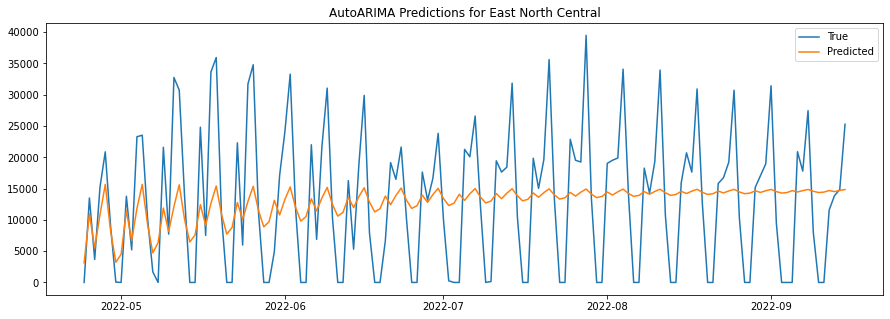


Training model for East South Central...
MAE: 8747.41
MSE: 122918157.38
RMSE: 11086.85
MASE: 2.64


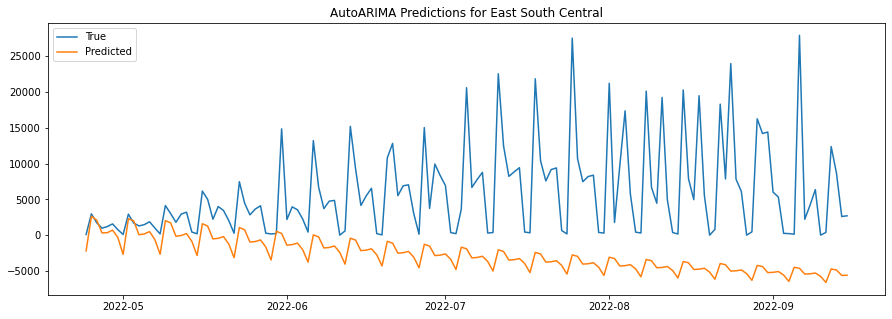


Training model for Mid-Atlantic...
MAE: 5395.93
MSE: 45872450.96
RMSE: 6772.92
MASE: 2.54


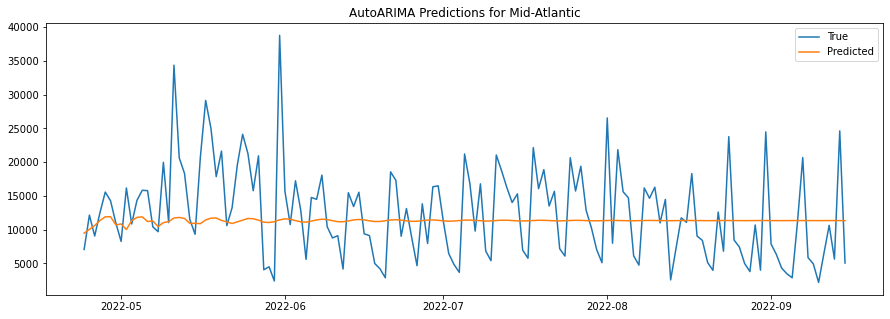


Training model for Mountain...
MAE: 4630.93
MSE: 58837389.6
RMSE: 7670.55
MASE: 1.46


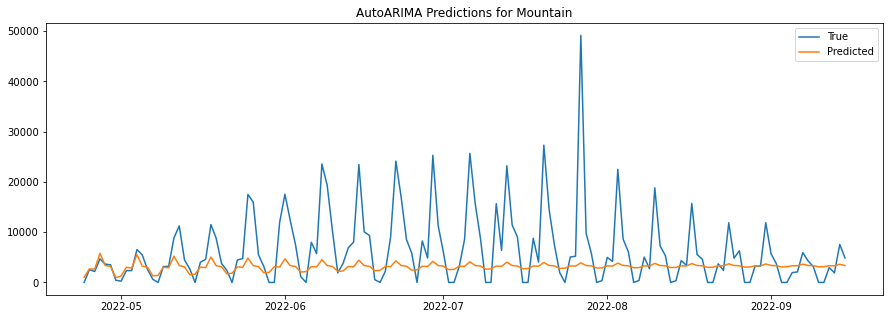


Training model for New England...
MAE: 3623.15
MSE: 19211295.92
RMSE: 4383.07
MASE: 1.45


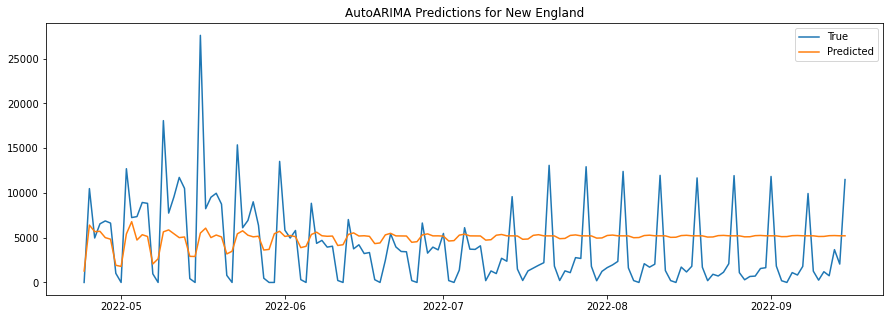


Training model for Pacific...
MAE: 23973.42
MSE: 776648590.32
RMSE: 27868.42
MASE: 3.58


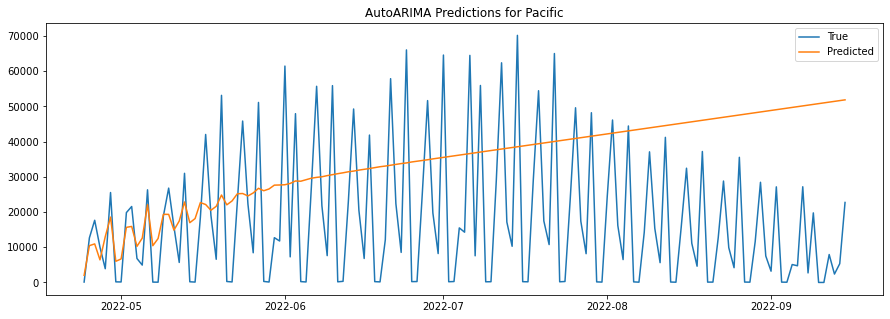


Training model for South Atlantic...
MAE: 15259.87
MSE: 485535350.13
RMSE: 22034.87
MASE: 1.46


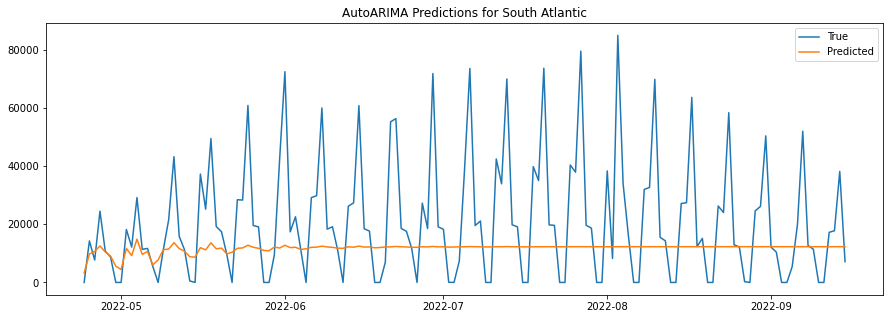


Training model for West North Central...
MAE: 5600.0
MSE: 45992446.86
RMSE: 6781.77
MASE: 1.79


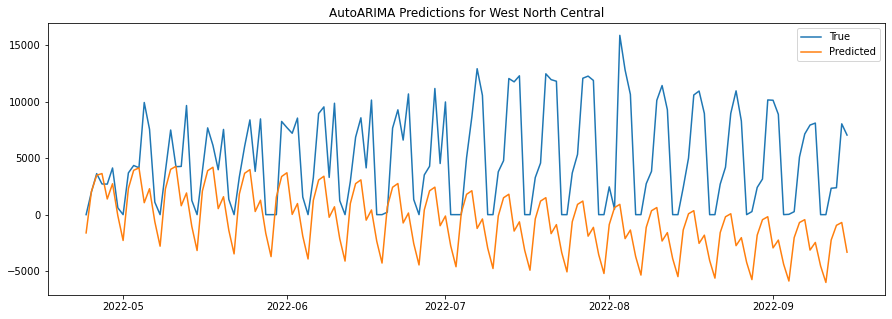


Training model for West South Central...
MAE: 7233.79
MSE: 96766443.13
RMSE: 9836.99
MASE: 1.64


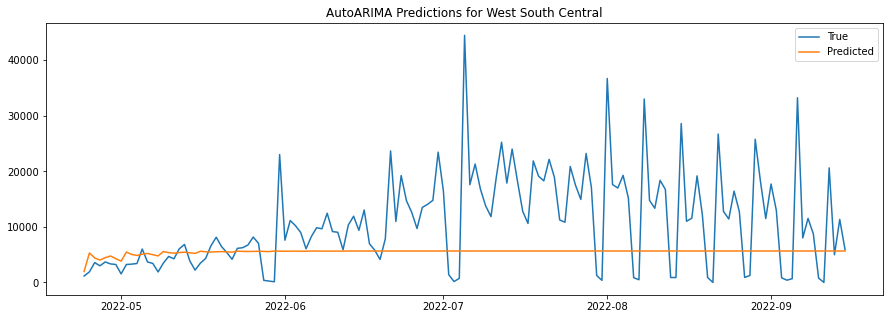


--- 2081.95 seconds ---


In [13]:
start_time = time.time()
for df in datasets:
    baseline_auto_arima(df, plot=True)
    print("")
print(f"--- {round(time.time() - start_time, 2)} seconds ---")